# Libraries used in this notebook

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# SDSS DR17 data set

Our chosen data set is the SDSS DR17 file found on Kaggle and is included in the repository. The code block below calls the csv file and stores the file in a pandas data frame. Before we can use our data set however, we need to 'Encode' our class feature column by converting our string variables into integer variables, as the sklearn library cant compute string variables. We then display a few random rows to show the contents of the file. Class 0 is a Galaxy, class 1 is a Quasar, class 2 is a Star

In [12]:
file_path = r'/workspaces/ACT-coursework-2/star_classification.csv'
df_sdss = pd.read_csv(file_path)
df_sdss['class'] = LabelEncoder().fit_transform(df_sdss['class'])  #changes data from string to integer variables
df_sdss.sample(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99464,1.237661e+18,201.330704,55.894096,23.61076,21.70063,20.15793,19.08892,18.60694,3705,301,2,55,7.687886e+18,0,0.535956,6828,56430,877
50059,1.237666e+18,209.014256,24.509805,19.91356,18.13183,17.32348,16.95377,16.65889,4670,301,1,81,2.385851e+18,0,0.063949,2119,53792,251
22709,1.237646e+18,50.917168,0.901690,17.56852,16.07338,15.48176,15.28377,15.19522,109,301,6,108,1.706964e+18,2,0.000240,1516,52933,362
90936,1.237662e+18,188.431441,6.411827,19.73677,18.32617,17.73319,17.38837,17.11091,3841,301,1,157,1.833043e+18,0,0.080686,1628,53474,285
85756,1.237664e+18,42.420861,-0.801737,24.52619,21.62689,21.16117,21.14868,20.95585,4263,301,2,399,4.775000e+18,1,0.515110,4241,55450,212
2813,1.237674e+18,116.422315,42.446388,20.99509,20.59649,20.13013,19.97054,19.61674,6573,301,6,220,4.887176e+17,1,1.065842,434,51885,280
23943,1.237652e+18,200.542414,3.218414,21.39300,20.78523,19.95056,19.19990,18.75250,1458,301,5,506,5.360477e+18,0,0.511082,4761,55633,247
71254,1.237679e+18,17.907585,-3.633765,20.39952,20.08786,19.95799,19.66942,19.53672,7907,301,1,191,8.911766e+18,1,1.730362,7915,57309,974
36006,1.237660e+18,49.166903,0.887844,24.77437,21.46821,19.96041,19.14068,18.62951,3438,301,6,128,1.199183e+18,2,0.000010,1065,52586,361
96284,1.237659e+18,213.766110,51.728679,23.24837,22.07244,20.36108,19.45239,19.01904,3180,301,4,66,7.591024e+18,0,0.483532,6742,56415,753


# ML Classifier

We will be using a Random Forest classifier to classify wether a data point is a Star, Galaxy or quasar 'QSO'. A Random Forest is a collection of decision trees all running simultaneously, each using a random selection of the data sets feartures to map their branches. Once all trees have been mapped, they 'vote' on the most common classification of the data points.

First, we define our 'X' and 'y' data sets as the independent variable data features, such as our magnitude and redshift features, and the dependant classification feature respectively. Then we can then define our testing and training data using the train_test_split function from the sklearn.model_selction library. Our test data will make up 70% of the SDSS DR17 data set, while our training data will be comprised of the remaining 30%.

In [9]:
X = df_sdss.drop(['class'], axis = 1) #uses all columns except class column
y = df_sdss['class'] # uses only class column
X_train_sdss, X_test_sdss, y_train_sdss, y_test_sdss = train_test_split(X, y, test_size = 0.3, random_state = 42) #divides the data between training and testing data randomly

To create our Random Forest, we use the RandomForestClassifier fucntion from the sklearn.ensemble library, specifying the amount of decision trees that will be used, n_estimators, and a value for the 'random_state' which ensures our resuts our reproducable. The Random forest is then fitted to the training data, which is then used to predict the classes for our training data.

We then calculate the accuracy, mean squared error and root mean squared error of our Random forest.

In [10]:
rf_class = RandomForestClassifier(n_estimators = 100, random_state = 42) #specifying amount of decision trees to be used and 
rf_class.fit(X_train_sdss, y_train_sdss) #trains random forest
y_pred = rf_class.predict(X_test_sdss) #tests random forest 

#calculates accuracy, mean squared error and root mean squared error and prints them below cell
accuracy = accuracy_score(y_test_sdss, y_pred)
mse = mean_squared_error(y_test_sdss, y_pred)
rmse = np.sqrt(mse)
print('Accuracy: ', accuracy*100,'%')
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

KeyboardInterrupt: 

As we can see, our Random forest classifier has been very successful with an accuracy of 97.87% and a mean squared error of only 0.0258. 

# Model parameters

The parameters of our Machine learning model are shown below. We can see that we used 100 trees in our forest which we specified earlier, and that the program automatically assigned the maximum features used by each tree as the square root of the total features. We also see that bootstrap has been set to true which ensures each tree uses a random selction of features, and that generally most parameters aren't used.

In [ ]:
rf_params = rf_class.get_params()
rf_params_df = pd.DataFrame([rf_params]).T
display(rf_params_df)

,0
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


# Feature importance for Random Forest

Below we can clearly see that the main contributing feature in our data set is redshift, responisble for more than 50% of our outcomes. We also see that our magnitudes in the 'u', 'g', 'r', 'i', & 'z' bands play an important role.

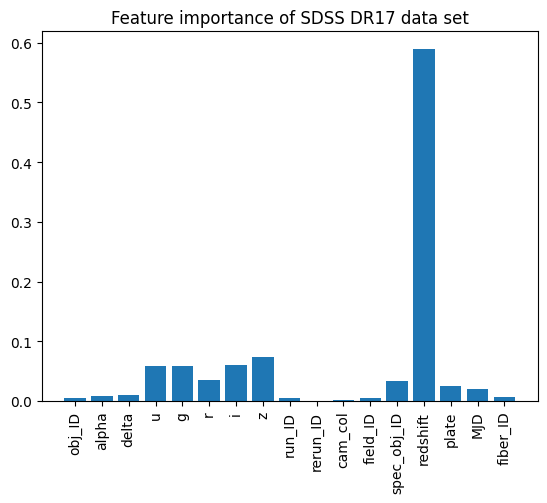

In [ ]:
plt.title('Feature importance of SDSS DR17 data set')
plt.bar(rf_class.feature_names_in_, rf_class.feature_importances_)
plt.xticks(rotation=90) #rotates labels on x axis by 90 degrees, otherwise impossible to read text
plt.show()